# Ознакомиться с некоторыми средствами математического анализа в Python.


1. Вычисляет значение производной в заданной точке. Входные  параметры – функция  («экспоненциальная», «логарифмическая», «степенная»), координата точки; выходные – значение производной.


Производная в какой функции экспоненциальная, логарифмическая, степенная?степенная
В точке9


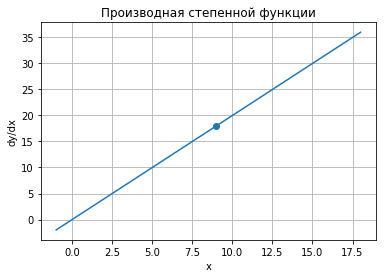

In [22]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

func = input('Производная в какой функции экспоненциальная, логарифмическая, степенная?')
x0 = float(input('В точке'))
x = Symbol('x')
if func == 'экспоненциальная':
    y = exp(x)
elif func == 'логарифмическая':
    y = log(x)
elif func == 'степенная':
    y = x**2
yprime = y.diff(x)
f = lambdify(x, yprime, 'numpy')
X = np.array(np.arange(x0 - 10, x0 + 10))
Y = f(X)
plt.plot(X, Y)
plt.scatter(x0, f(x0))
plt.title('Производная '+ func[:-2]+'ой функции')
plt.xlabel('x')
plt.ylabel('dy/dx')
plt.grid()


2. Вычисляет площадь фигуры, ограниченную полиномом второй степени. Входные параметры – коэффициенты полинома, пределы интегрирования; выходной – площадь.  


a b c 1 2 3
x1 x2 -4 8
Площадь: 276.0, погрешность: 3.064215547965432e-12


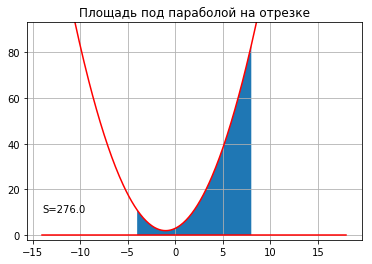

In [50]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

def f1(x):
    y = a*x**2 + b*x + c
    return y if y > 0 else 0

a, b, c = map(float, input('a b c ').split())
x1, x2 = map(float, input('x1 x2 ').split())
I = quad(f1, x1, x2)
print(f'Площадь: {I[0]}, погрешность: {I[1]}')

x = np.linspace(x1, x2, 300)
y1 = a*x**2 + b*x + c
y2 = 0

plt.title('Площадь под параболой на отрезке')
plt.fill_between(x, y1, y2)
plt.ylim(-2, max(y1)+10)
X = np.linspace(x1-10, x2+10, 320)
plt.plot(X, [f1(x) for x in X], 'red')
plt.plot(X, [0]*len(X), 'red')
plt.text(x1-10, 10, 'S='+str(I[0]))
plt.grid()

plt.show()

3. Вычисляет производную полинома второй степени и выводит график исходной функции и производной. Входные параметры – коэффициенты полинома.


a b c 1 4 5


Text(0, 0.5, 'Y')

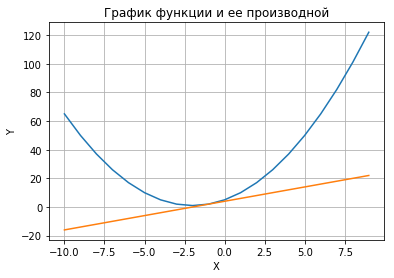

In [52]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

a, b, c = map(float, input('a b c ').split())
x = Symbol('x')
y = a*x**2 + b*x + c
yprime = y.diff(x)
f = lambdify(x, yprime, 'numpy')

X = np.array(np.arange(-10, 10))
Y = [a*x**2 + b*x + c for x in X]
dY = f(X)

plt.title('График функции и ее производной')
plt.plot(X, Y)
plt.plot(X, dY)
plt.grid()
plt.xlabel('X')
plt.ylabel('Y')

4. Находит экстремумы полиномов  3-го  порядка. Входные параметры – коэффициенты полинома; выходные – координаты экстремумов.


a b c d 1 2 -20 3


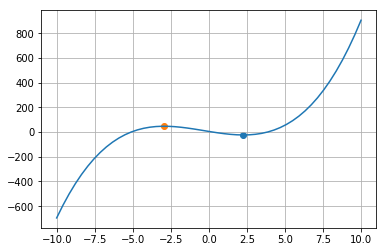

In [71]:
from scipy.optimize import minimize

def poly3(a, b, c, d, x):
    return x**3*a + x**2+b + x*c + d

a, b, c, d = map(float, input('a b c d ').split())
min_stat = minimize(lambda x: poly3(a, b, c, d, x), 0)
X = np.linspace(-10, 10, 50)
Y = [poly3(a, b, c, d, xi) for xi in X]
plt.plot(X, Y)
x1, y1 = min_stat.x[0], min_stat.fun
min_stat = minimize(lambda x: -poly3(a, b, c, d, x), 0)
x2, y2 = min_stat.x[0], min_stat.fun
plt.scatter(x1, y1)
plt.scatter(x2, poly3(a,b,c,d,x2))
plt.grid()

In [96]:
def poly3(a, b, c, d, x):
    return x**3*a + x**2+b + x*c + d

5. Вычисляет интеграл заданных функций.  Входные параметры – функция («экспоненциальная», «логарифмическая», «степенная»), пределы интегрирования; выходные – значение интеграла.


Интеграл от какой функции экспоненциальная, логарифмическая, степенная?степенная
x1 x2 1 10
(21939.492281220373, 5.5988439521703626e-05)


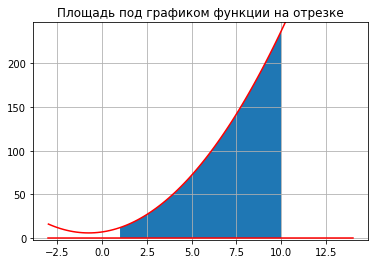

In [85]:
import matplotlib.pyplot as plt
# from math import log, exp
from scipy.integrate import quad
from numpy import log, exp
a, b, c = 2, 3, 7

def f1(x):
    y = a*x**2 + b*x + c
    return y if y > 0 else 0

def f2(x):
    y = log(x) + 4
    return y if y > 0 else 0

def f3(x):
    y = exp(x) - 10
    return y if y > 0 else 0

func = input('Интеграл от какой функции экспоненциальная, логарифмическая, степенная?')
x1, x2 = map(float, input('x1 x2 ').split())
x = np.linspace(x1, x2, 300)
X = np.linspace(x1-4, x2+4, 100)

if func == 'экспоненциальная':
    I = quad(f1, x1, x2)
    y1 = exp(x)
    Y = exp(X)
elif func == 'логарифмическая':
    I = quad(f2, x1, x2)
    y1 = log(x)
    Y = log(X)
elif func == 'степенная':
    I = quad(f3, x1, x2)
    y1 = a*x**2 + b*x + c
    Y = [a*x**2 + b*x + c for x in X]

plt.plot(X, Y, 'red')
print(I)
y2 = 0

plt.title('Площадь под графиком функции на отрезке')
plt.fill_between(x, y1, y2)
plt.ylim(-2, max(y1)+10)
plt.plot(X, [0]*len(X), 'red')
# plt.text(x1-10, 10, 'S='+str(I[0]))
plt.grid()

plt.show()

6. Вычисляет скорость и ускорение  физического тела  в заданной точке. Тело движется по кривой описываемой полиномом третьей степени. Входные параметры – коэффициенты полинома, координата  точки; выходные значение скорости и ускорения.

a b c d 2 3 1 10
5
181.0 66.0


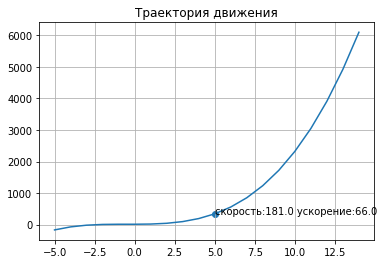

In [103]:
from scipy.optimize import minimize

def poly3(a, b, c, d, t):
    y = a*t**3 + b*t**2 + t*c + d
    return y
a, b, c, d = map(float, input('a b c d ').split())
t0 = float(input())

x = Symbol('x')
y = a*x**3 + b*x**2 + c*x + d

yprime = y.diff(x)
yprime2 = yprime.diff(x)

vx = lambdify(x, yprime, 'numpy')
ax = lambdify(x, yprime2, 'numpy')

X = np.array(np.arange(t0 - 10, t0 + 10))
Y = [poly3(a, b, c, d, x) for x in X]

plt.title('Траектория движения')
plt.plot(X, Y)
plt.scatter(t0, poly3(a,b,c,d,t0))
plt.text(t0, poly3(a,b,c,d,t0), 'скорость:'+str(vx(t0))+' ускорение:'+str(ax(t0)))

plt.grid()

print(vx(t0), ax(t0))